<font color = 'red'>

<h1> Desafío Elige un nuevo miembro </h1> 

---

<a id = "1"></a>
## Introducción

<p style="text-align: justify;">¡El equipo “High Five” busca nuevos miembros! La competencia para las vacantes fue feroz entre los mejores 5 jugadores y los datos de tres de sus pruebas han llegado. Tu trabajo ahora será generar un reporte con las gráficas que tú creas necesarias para poder entender mejor los datos (el resto del equipo es algo flojo e insisten en sólo leer un reporte con poco texto y gráficas de colores vibrantes y diseños llamativos). </p>

<h2> Prueba 1 </h2> <h4>El score más alto.</h4>
<p style="text-align: justify;"> Durante 30 días se registró el tiempo en minutos que tardó cada jugador en llegar a un score 
determinado. ¿Cómo harías una gráfica para observar su desempeño a lo largo de los 30 días? </p>

*ver archivo adjunto tiempos_para_llegar_al_mejor_score.csv*



In [1]:
import pandas as pd # Libreria pandas para el manejo de datos
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set_style("darkgrid")
sbn.set_palette("bright")


plt.style.use('ggplot')
markers = ['*' 'k', 'v','P','X','^']
colors = ['#e74c3c','#5dade2','#58d68d','#af7ac5','#f7dc6f']


In [2]:
score = pd.read_csv("documentos/tiempos_para_llegar_al_mejor_score.csv")

In [3]:
dias = list(score.Day.unique())
players= list(score['Player ID'].unique())
media = score.groupby("Player ID")['Minutes to get that score'].mean()

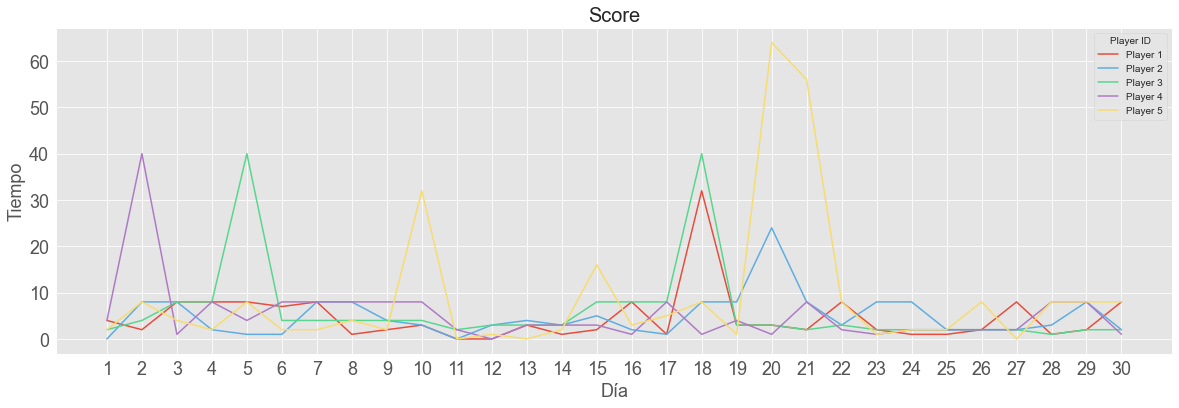

In [8]:

plt.figure(figsize=(20,6))
sbn.lineplot(x="Day", y="Minutes to get that score", hue='Player ID', data=score, palette=colors, markers=True,)

plt.title("Score", fontsize=20)
plt.ylabel("Tiempo",fontsize=18)
plt.xlabel("Día",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(dias,fontsize = 18)
#plt.xlim(-1,20)
plt.grid(True)
plt.show()

De acuerdo a la gráfica anterior, el **Player 2** fue el que tuvo un mejor rendimiento, ya que solo un día tuvo un tiempo alto para completar la prueba que no pasó los 30 minutos, mientras que los demás jugadores tuvieron 1 o más días en los que les tomo más de 30 minútos en completar la prueba.


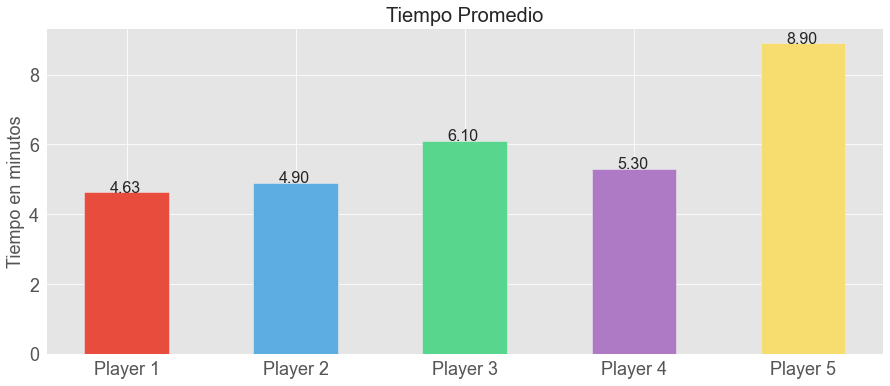

In [9]:

f, ax = plt.subplots(figsize=(15, 6))
plt.bar(list(media.index),media, 0.5, color = colors)
plt.title("Tiempo Promedio", fontsize=20)

plt.ylabel("Tiempo en minutos",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)

ax.xaxis.grid(True)
for i in range(len(media)):
    plt.annotate('%1.2f' %media[i], xy=((i-0.1),media[i]),fontsize = 16)
plt.show()


Esta gráfica nos muestra el tiempo promedio que le tomo a cada participante en finalizar su prueba, siendo el **Player 1** el participante que en los 30 días, tardo menos en promedio, seguido del **Player 2** que tuvo un gran rendimiento.

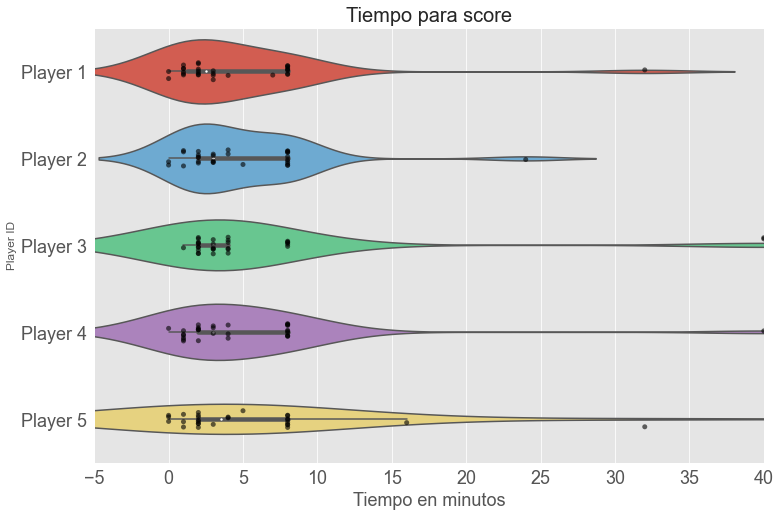

In [10]:
mediana = score.groupby("Player ID")['Minutes to get that score'].median()
f, ax = plt.subplots(figsize=(12, 8))
plt.title("Tiempo para score", fontsize=20)
sbn.violinplot(y="Player ID", x="Minutes to get that score", data=score, palette=colors)
sbn.stripplot(y="Player ID", x="Minutes to get that score", data=score ,size=5, color="k", linewidth=0, alpha=.6)

plt.xlabel("Tiempo en minutos",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
plt.xlim(-5,40)
ax.xaxis.grid(True)


plt.show()

Esta última gráfica muestra los tiempos que obtuvieron los participantes y su distribución en los 30 días que se realizó la prueba, siendo el **Player 1** y el **Player 2** quienes demostraron mejores resultados al tener una mayor concentración de sus resultados en los valores debajo de 5 minutos al observarse una gráfica más amplia en esa zona en comparación con los diferentes participantes.

----

<h2> Prueba 2 </h2> <h4>Tu género de videojuego favorito</h4>
<p style="text-align: justify;"> Cada jugador participó en 3 videojuegos de 3 géneros distintos (FPS, ACTION y RPG). En 20 ocasiones para cada videojuego, se calificó la partida. Si la calificación de la partida fue mayor a 10, se considera como exitosa; de otra forma, la partida se considera un fracaso. Para cada videojuego, ¿qué porcentaje de partidas exitosas tuvo cada jugador? </p>

*ver archivo adjunto scores_by_game_and_player.csv*

In [11]:
genero = pd.read_csv("documentos/scores_by_game_and_player.csv")

In [12]:
genero.columns = ['match','player','adventure', 'score']
print("Se jugaron un total de", genero.adventure.nunique(), 'generos de videojuegos')
print('Las categorías son:', str(genero.adventure.unique()))
print('Cada uno de los', genero.player.nunique(), 'jugadores jugó \n', genero.groupby(['player','adventure']).match.count())

Se jugaron un total de 3 generos de videojuegos
Las categorías son: ['FPS' 'ACTION' 'RPG']
Cada uno de los 5 jugadores jugó 
 player    adventure
Player 1  ACTION       20
          FPS          20
          RPG          20
Player 2  ACTION       20
          FPS          20
          RPG          20
Player 3  ACTION       20
          FPS          20
          RPG          20
Player 4  ACTION       20
          FPS          20
          RPG          20
Player 5  ACTION       20
          FPS          20
          RPG          20
Name: match, dtype: int64


In [13]:
promedio = (genero[genero.score > 10].groupby(['adventure','player']).score.count()/genero.groupby(['player','adventure']).match.count())
action = promedio[0:5]
fps = promedio[5:10]
rpg = promedio[10:15]
titulo = [ 'action', 'fps', 'rpg']

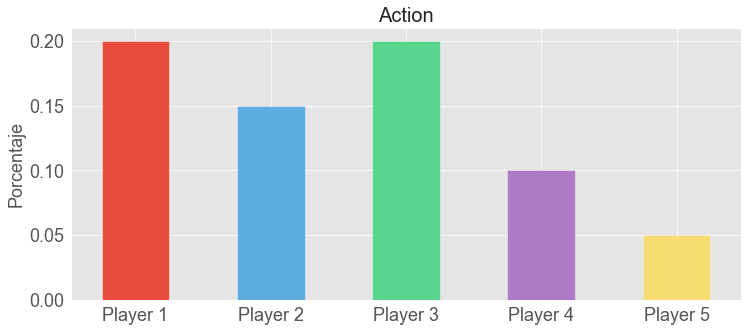

In [14]:

f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),action, 0.5, color=colors)
plt.title("Action", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks([0,0.05,0.10,0.15,0.20],fontsize=18)

plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)
plt.show()



Esta gráfica nos demuestra que el **Player 1** y el **Player 3** fueron los que obtuvieron mejores resultados al tener un 20% de partidas exitosas en el genero **Action** .

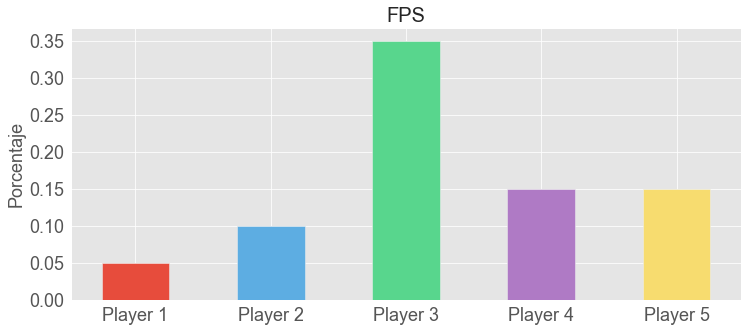

In [15]:
f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),fps, 0.5, color=colors)
plt.title("FPS", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)
plt.show()



En el genero **FPS** el **Player 3** fue quien obtuvo el mejor resultado con un 35% de sus partidas exitosas, seguido de el **Player 4 y Player 5** con un 15% de partidas exitosas.

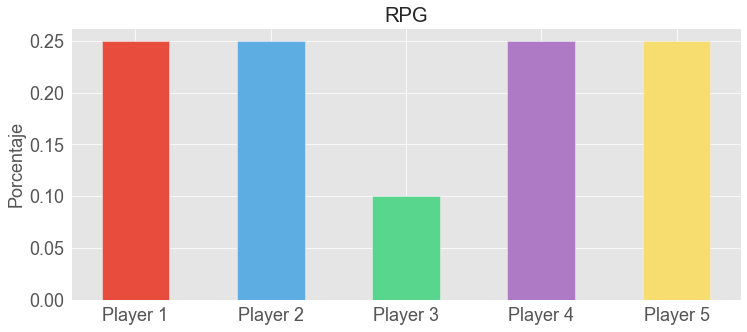

In [16]:
f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),rpg, 0.5, color=colors)
plt.title("RPG", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)
plt.show()

En el genero **RPG** hubo un resultado homogeneo de 25% de partidas exitosas, siendo el **Player 3** el que peor desempeño tuvo en esta categoría con un 10% de partidas exitosas.

<h2> Prueba 3 </h2> <h4>Tu género de videojuego favorito</h4>
<p style="text-align: justify;"> En 20 ocasiones, cada jugador lanzó una jabalina a un campo abierto. El objetivo era medir la puntería, por lo que se registraron las coordenadas en las que cayó la jabalina en cada intento. ¿De qué forma se te ocurre visualizar esta información? </p>

*ver archivo adjunto position_of_players.csv*

In [17]:
pos = pd.read_csv("documentos/position_of_players.csv")

In [18]:
pos1 = pos[pos.No == 'Player 1']
pos2 = pos[pos.No == 'Player 2']
pos3 = pos[pos.No == 'Player 3']
pos4 = pos[pos.No == 'Player 4']
pos5 = pos[pos.No == 'Player 5']

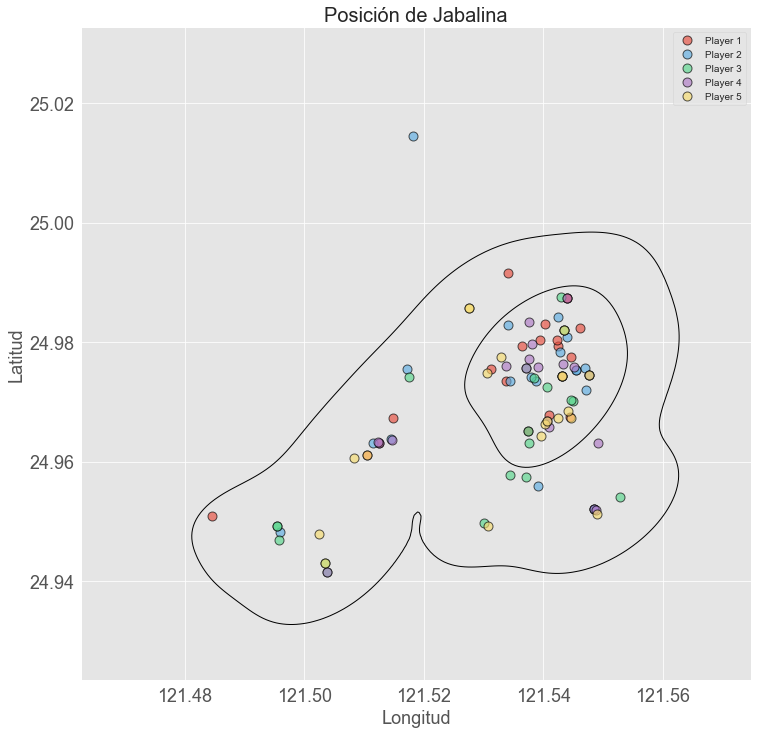

In [19]:
a=0
f, ax = plt.subplots(figsize=(12,12))

for play in players:
 
    plt.plot(pos[pos.No == play].Longitud, pos[pos.No == play].Latitude, '.', color=colors[a],markersize=18, mec = 'k', alpha = 0.65)
    
    a=a+1
    
plt.legend(players)
sbn.kdeplot(x='Longitud', y='Latitude',levels=3, color="k", linewidths=1, data=pos)
plt.title("Posición de Jabalina", fontsize=20)
plt.xlabel("Longitud",fontsize=18)
plt.ylabel("Latitud",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)

ax.grid(True)   


plt.show()



Esta gráfica muestra la posición de cada jabalina lanzada por cada participante, mostrando que los lanzamientos se agruparon principalmente en una zona.

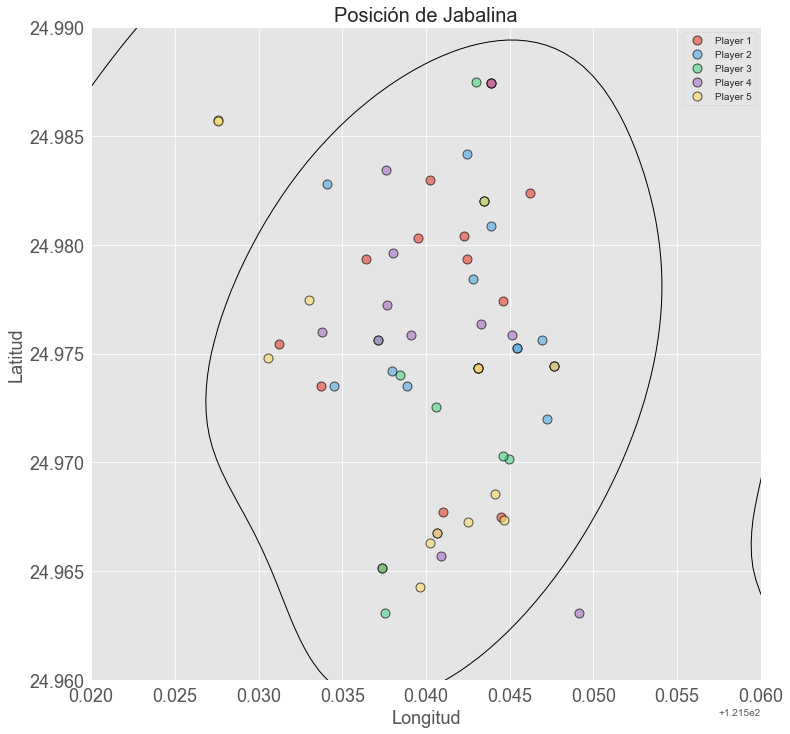

In [20]:
a=0
f, ax = plt.subplots(figsize=(12,12))

for play in players:
 
    plt.plot(pos[pos.No == play].Longitud, pos[pos.No == play].Latitude, '.', color=colors[a],markersize=18, mec = 'k', alpha = 0.65)
    
    a=a+1
    
plt.legend(players)
sbn.kdeplot(x='Longitud', y='Latitude',levels=3, color="k", linewidths=1, data=pos)
plt.title("Posición de Jabalina", fontsize=20)
plt.xlabel("Longitud",fontsize=18)
plt.ylabel("Latitud",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.grid(True)   

plt.xlim(121.52, 121.56)
plt.ylim(24.96,24.99)
plt.show()

Esta zona muestra que el **Player 5** tuvo una mayor exactitud y presición al tener mayor número de lanzamientos en la zona donde cayeron más jabalinas.

Esta gráfica sólo es demostrativa ya que es necesario observar los lanzamientos de manera individual.

Para entender mejor los resultados es necesario conocer la diferencia entre precisión y exactitud:

<img src="documentos/exactitud-y-precision.jpg">

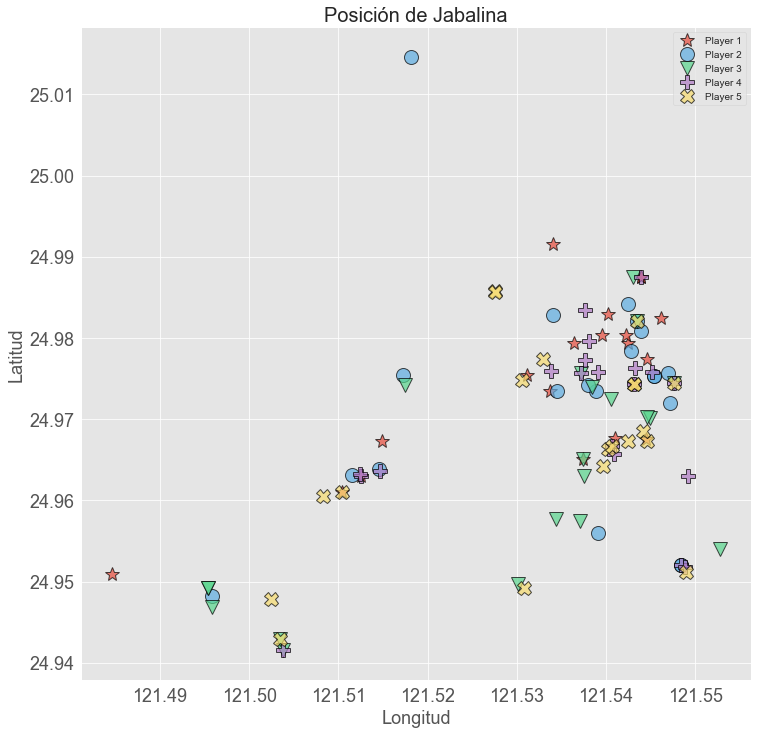

In [21]:
f, ax = plt.subplots(figsize=(12, 12))
plt.plot(pos1.Longitud, pos1.Latitude,'*', color=colors[0],markersize=14, mec = 'k', alpha = 0.7)
plt.plot(pos2.Longitud, pos2.Latitude,'o', color=colors[1],markersize=14, mec = 'k', alpha = 0.7)
plt.plot(pos3.Longitud, pos3.Latitude,'v', color=colors[2],markersize=14, mec = 'k', alpha = 0.7)
plt.plot(pos4.Longitud, pos4.Latitude,'P', color=colors[3],markersize=14, mec = 'k', alpha = 0.7)
plt.plot(pos5.Longitud, pos5.Latitude,'X', color=colors[4],markersize=14, mec = 'k', alpha = 0.7)

plt.legend(players)

plt.title("Posición de Jabalina", fontsize=20)
plt.xlabel("Longitud",fontsize=18)
plt.ylabel("Latitud",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)


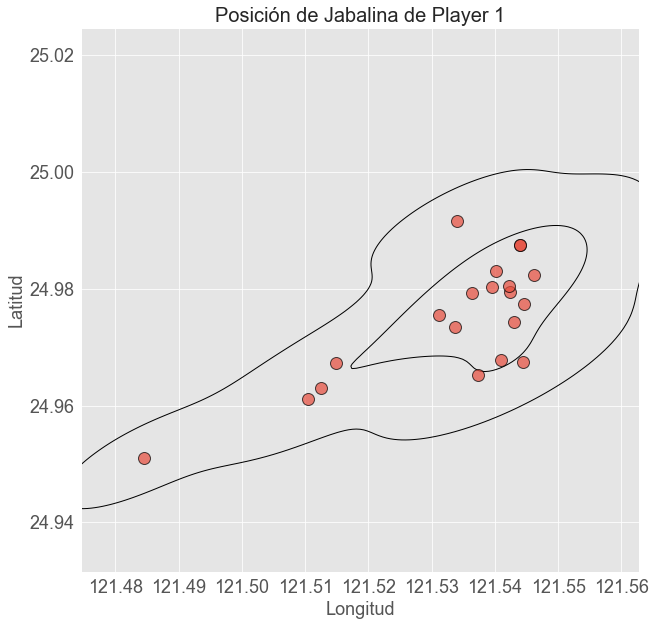

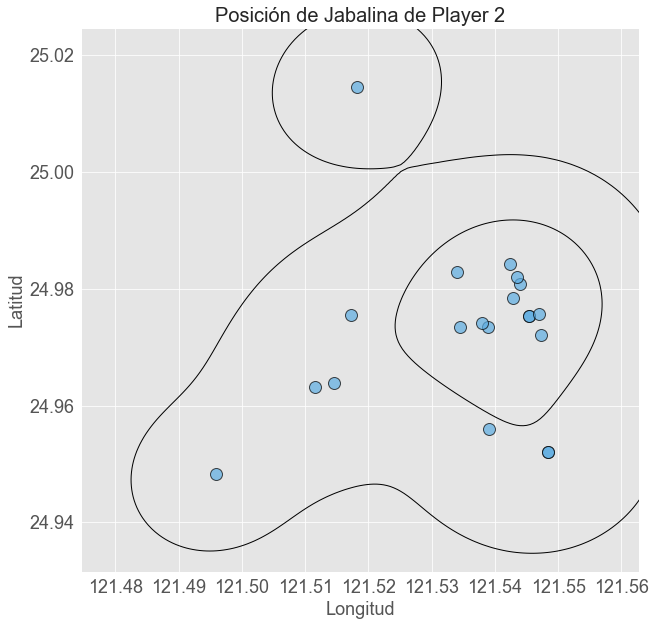

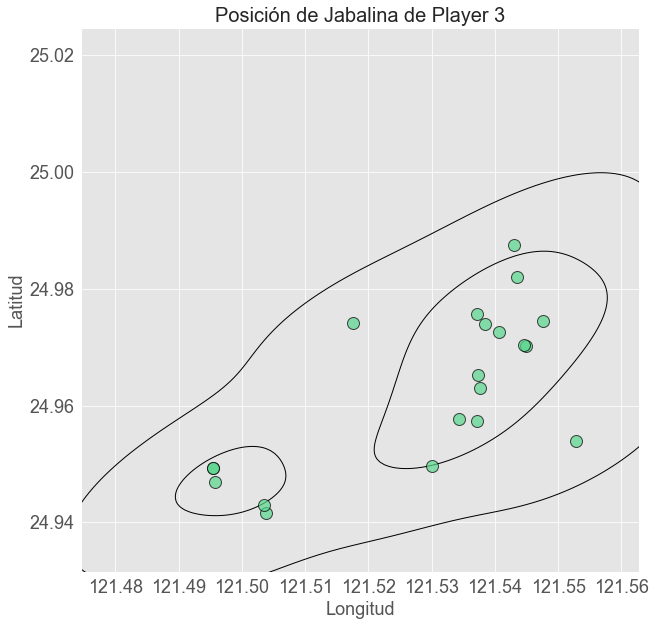

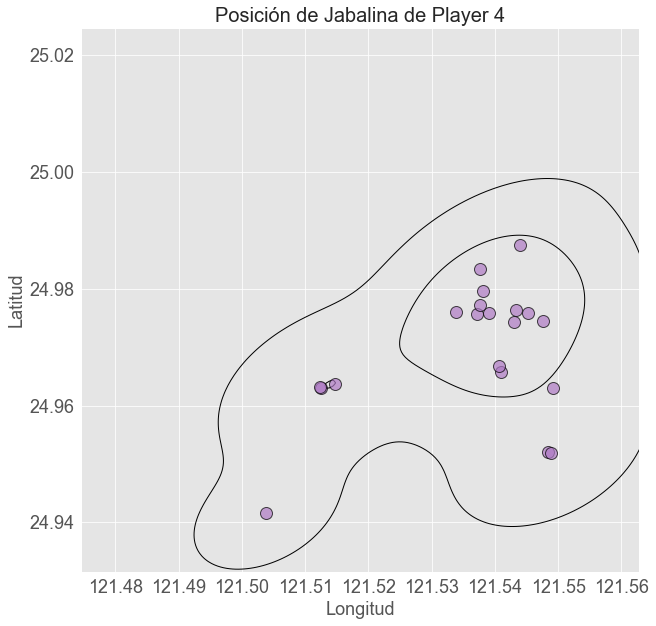

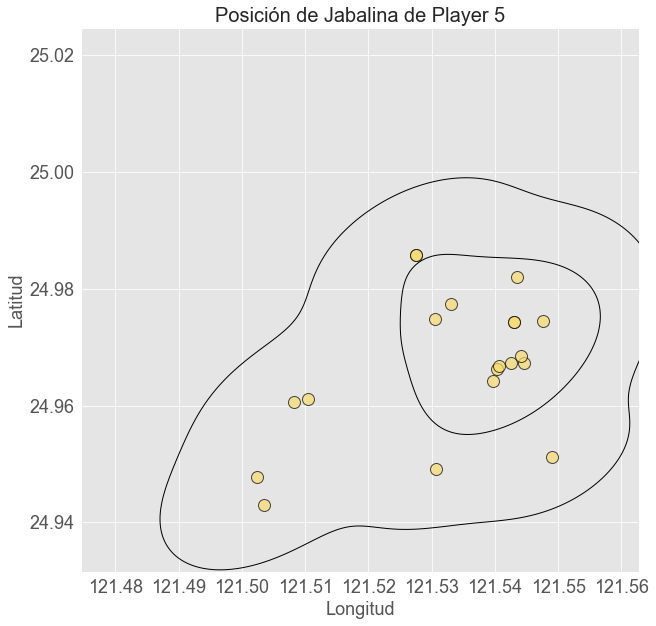

In [22]:
a=0


for play in players:
    f, ax = plt.subplots(figsize=(10, 10)) 
    plt.plot(pos[pos.No == play].Longitud, pos[pos.No == play].Latitude, 'o', color=colors[a],markersize=12, mec = 'k', alpha = 0.7)
    sbn.kdeplot(x=pos[pos.No == play].Longitud, y=pos[pos.No == play].Latitude, levels=3, color="k", linewidths=1)
    #plt.legend(players[a])
    plt.title("Posición de Jabalina de %s" %players[a], fontsize=20)
    plt.xlabel("Longitud",fontsize=18)
    plt.ylabel("Latitud",fontsize=18)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize = 18)
    plt.xlim(pos.Longitud.min()-0.01,pos.Longitud.max()+0.01)
    plt.ylim(pos.Latitude.min()-0.01,pos.Latitude.max()+0.01)
    ax.grid(True) 
    plt.show()
    #print(players[a])
    a=a+1
    

Con ayuda de la imagen anterior se analizaron estas gráficas. 

Aquellos participantes que muestren un área delimita más pequeña serán aquellos que tengan mayor presición.
Aquellos que contengan mayor numero de puntos de color dentro de estas áreas seran los que tengan mayor exactitud.

Los **Player 1 y Player 5** fueron los que demotraron una mayor presición y exactitud al tener la mayoría de sus lanzamientos en áreas más pequeñas y con más jabalinas en estos lugares.

A pesar de que el **Player 5** tambien cuenta con un área pequeña, se optó por el **Player 1** debido a que fueron menos sus jabalinas que quedaron fuera del área interior o más cerca de ella.

Analizando las últimas pruebas se obtuvo que:

**PRUEBA 1**

Player 1 y Player 2

**PRUEBA 2**

+ A
    + (Player 1 y 3 por igual) y 2
+ B
    + Player 3, (4 y 5 por igual)
+ C
    + (Player 1, 2, 4 y 5 por igual)
    
    
 *Mejores Player 1 y 3*

**PRUEBA 3**

Player 1 y player 5

**Conclusión:**

El participante que mostró mejores resultados fue el **Player 1**, siendo esta persona la mejor para el equipo de acuerdo a su rendimiento en las pruebas.
